In [1]:
using Pkg
Pkg.activate("..")

  Activating project at `~/repos/ProactiveHRI.jl`


In [ ]:
# Pkg.instantiate()
# Pkg.update()

In [61]:
include("dynamics.jl")
include("planner.jl")
include("planner_utils.jl")
include("utils.jl")
include("plotting.jl")
include("mpc.jl")
include("sim.jl")
include("experiments.jl")
include("velocity_obstacles.jl")

reactive_velocity_obstacles (generic function with 1 method)

### Interaction planner

In [ ]:
dt = 0.1
velocity_max = 3.0
# human = SingleIntegratorPolar2D(dt, velocity_max, [pi, 2.])
human = Unicycle(dt, velocity_max, [1., 3.])

time_horizon = 25
# Q = zeros(Float64, human.state_dim, human.state_dim)
# R = diagm([0.; 0.1]) 
# Qt = diagm([10.; 10.])
Q = diagm([0.0; 0.0; 0.])
R = diagm([1.0; 0.1]) 
Qt = diagm([10.; 10.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.01]
collision_radius = 1.
inconvenience_ratio = 0.2


human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 3.0
# robot = Unicycle(dt, velocity_max, [1.0, 2.])
robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 3.])

# time_horizon = 45
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)


In [ ]:
robot_initial_state = [5.; 5.; -pi / 2.; 0.]
robot_goal_state = [5.; -5.; -pi / 2; 0.]
human_initial_state = [5.; -5.; pi / 2]
human_goal_state = [5.; 5.; pi / 2]
solver = "ECOS"

ip = InteractionPlanner(robot_hps, 
                        human_hps,
                        robot_initial_state,
                        human_initial_state,
                        robot_goal_state,
                        human_goal_state,
                        solver)
# 
# ip = InteractionPlanner(human_hps, 
#                         robot_hps,
#                         human_initial_state,
#                         robot_initial_state,
#                         human_goal_state,
#                         robot_goal_state,
#                         solver)

In [ ]:
# Adds a wall constraint to the planner
wall_1 = Wall("x", 0., 6.1, "less")
wall_constraint(ip, wall_1, "wall_1")
wall_2 = Wall("x", 0.1, 3.2, "greater")
wall_constraint(ip, wall_2, "wall_2")

In [ ]:
incon_problem, xs, us = @time solve(ip.ego_planner.incon, iterations=10, verbose=false, keep_history=false)
incon_problem, xs, us = @time solve(ip.other_planner.incon, iterations=10, verbose=false, keep_history=false);



In [ ]:
plot_solve_solution(ip, walls=[wall_1, wall_2], pos_xlims=[-1, 11], pos_ylims=[-6, 6])

# Iterated Best Response

In [ ]:
@time ibr(ip, 3, "ego")

In [ ]:
plot_solve_solution(ip, pos_xlims=[-1, 11], walls=nothing, pos_ylims=[-6, 6])

# Animation

In [ ]:
animation(ip, pos_xlims=[-1, 11], pos_ylims=[-4, 4])

In [ ]:
avoidance_animation(ip, pos_xlims=[0, 10], pos_ylims=[-5, 5])

# MPC Controller Simulation
*At the moment it is a known issue that the sim breaks if the dynamics classes used are different between the different InteractionPlanner models, will be fixed

In [ ]:
include("sim.jl")
include("mpc.jl")

In [52]:
solver = "ECOS"

time_horizon = 25
dt = 0.1
velocity_max = 1.5

human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.1]
collision_radius = 1.
inconvenience_ratio = 0.2

human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5

robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

PlannerHyperparameters{Float64}
  dynamics: DynamicallyExtendedUnicycle{Float64}
  time_horizon: Int64 25
  Q: Array{Float64}((4, 4)) [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  R: Array{Float64}((2, 2)) [1.0 0.0; 0.0 1.0]
  Qt: Array{Float64}((4, 4)) [10.0 0.0 0.0 0.0; 0.0 10.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  markup: Float64 1.05
  collision_slack: Float64 150.0
  collision_markup: Float64 0.98
  trust_region_weight: Float64 5.0
  inconvenience_weights: Array{Float64}((3,)) [1.0, 1.0, 0.1]
  collision_radius: Float64 1.0
  inconvenience_ratio: Float64 0.2


In [53]:
robot_initial_state = [0.; 0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.; 0.]
human_initial_state = [10.; 0.; pi; 0.]
human_goal_state = [0.; 0.; pi; 0.]

robot_ip = InteractionPlanner(robot_hps, 
                        human_hps,
                        robot_initial_state,
                        human_initial_state,
                        robot_goal_state,
                        human_goal_state,
                        solver)


InteractionPlanner
  ego_planner: AgentPlanner
  other_planner: AgentPlanner


In [33]:
dt = 0.1
velocity_max = 1.5
human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

time_horizon = 25
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 0.3]) 
Qt = diagm([10.; 10.; 0.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.1] 
collision_radius = 1.
inconvenience_ratio = 0.2


human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5
# robot = Unicycle(dt, velocity_max, [1.0, 2.])
robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

# time_horizon = 45
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 0.0]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

PlannerHyperparameters{Float64}
  dynamics: DynamicallyExtendedUnicycle{Float64}
  time_horizon: Int64 25
  Q: Array{Float64}((4, 4)) [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  R: Array{Float64}((2, 2)) [1.0 0.0; 0.0 0.0]
  Qt: Array{Float64}((4, 4)) [10.0 0.0 0.0 0.0; 0.0 10.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  markup: Float64 1.05
  collision_slack: Float64 150.0
  collision_markup: Float64 0.98
  trust_region_weight: Float64 5.0
  inconvenience_weights: Array{Float64}((3,)) [1.0, 1.0, 0.1]
  collision_radius: Float64 1.0
  inconvenience_ratio: Float64 0.2


In [34]:
human_ip = InteractionPlanner(human_hps, 
                        robot_hps,
                        human_initial_state,
                        robot_initial_state,
                        human_goal_state,
                        robot_goal_state,
                        solver)

InteractionPlanner
  ego_planner: AgentPlanner
  other_planner: AgentPlanner


In [35]:
robot_path, robot_controls, human_path, human_controls, solve_times = simulate(robot_ip, human_ip, 75, ibr_iterations=2, leader="ego")

([0.0 0.0 0.0 0.0; 0.007499992676330003 0.0 -8.298637286121752e-14 0.14999985352660003; … ; 9.437994308275586 0.07241519917340694 -0.12349527275855267 0.8075816586201999; 9.516423938672125 0.06267996925146253 -0.12401087524508816 0.7730488011357451], [-8.298637286121751e-13 1.4999985352660004; 2.8560314786679702e-8 1.4999992088066432; … ; -0.00481608242849058 -0.34819953733781034; -0.005156024865354952 -0.3453285748445478], [10.0 0.0 3.141592653589793 0.0; 9.9919451792604 9.864310436457336e-19 3.141579845870588 0.1610964147920078; … ; 0.44529484913175965 -0.06019719121215634 3.0118717862495665 0.7966872447438651; 0.3680385909465212 -0.05011884775290441 3.0113192920375393 0.7615299975772264], [-0.0001280771920497873 1.610964147920078; 0.11925250547308268 1.4381055801261553; … ; -0.0054262718797326625 -0.3653157035072732; -0.005524942120270903 -0.3515724716663873], ([0.07989311218261719, 0.07651686668395996, 0.0786139965057373, 0.07615208625793457, 0.08306503295898438, 0.0804228782653808

┌ Info: Saved animation to /tmp/jl_EDaRcVgng3.gif
└ @ Plots /home/jasper/.julia/packages/Plots/3BCH5/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_EDaRcVgng3.gif")
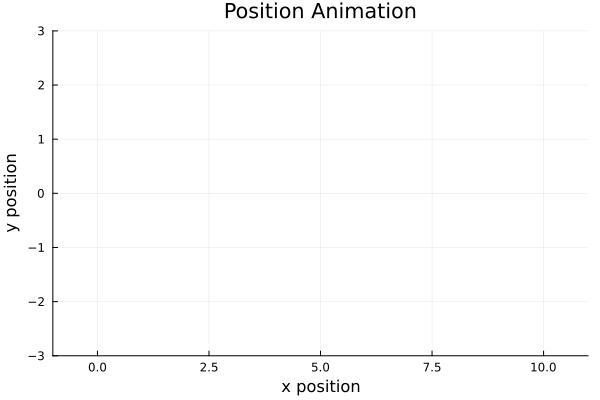

In [36]:
animation(robot_path, human_path, pos_xlims=[-1, 11])

In [ ]:
animation(robot_path, human_path, pos_xlims=[-1, 11])

In [ ]:
sum(solve_times[1]) / 50

In [ ]:
findmax(solve_times[1] )

In [ ]:
plt = plot(robot_path[:,1], robot_path[:,2], xlims=[-1, 10], ylims=[-5, 5])
plot!(plt, human_path[:,1], human_path[:,2])

In [ ]:
animation(robot_path, human_path, pos_xlims=[-1, 11], pos_ylims=[-2.5, 2.5])

# Summary Plots

### Setup the planner

In [ ]:
dt = 0.1
velocity_max = 1.5
# human = SingleIntegratorPolar2D(dt, velocity_max, [pi, 2.])
human = Unicycle(dt, velocity_max, [1., 1.5])

time_horizon = 50
# Q = zeros(Float64, human.state_dim, human.state_dim)
# R = diagm([0.; 0.1]) 
# Qt = diagm([10.; 10.])
Q = diagm([0.0; 0.0; 0.])
R = diagm([1.0; 0.0]) 
Qt = diagm([10.; 10.; 0.])
markup = 0.8
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.01]
collision_radius = 1.
inconvenience_ratio = 0.13


human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5
# robot = Unicycle(dt, velocity_max, [1.0, 2.])
robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 3.])

# time_horizon = 45
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)


In [ ]:
robot_initial_state = [0.; 0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.; 0.]
human_initial_state = [10.; 0.; pi]
human_goal_state = [0.; 0.; pi]
solver = "ECOS"

ip = InteractionPlanner(robot_hps, 
                        human_hps,
                        robot_initial_state,
                        human_initial_state,
                        robot_goal_state,
                        human_goal_state,
                        solver)

In [ ]:
incon_problem, xs, us = @time solve(ip.ego_planner.incon, iterations=10, verbose=false, keep_history=false)
incon_problem, xs, us = @time solve(ip.other_planner.incon, iterations=10, verbose=false, keep_history=false);

In [ ]:
@time saved_data_test, _, _, _, _ = ibr_save(ip, 5, "ego")

In [ ]:
include("plotting.jl")

In [ ]:
plot_example = plot_solve_solution(saved_data_test, scatter=false, show_speed=true, show_control=true)

In [ ]:
function plot_solve_solution(problem::SaveData, second_problem::SaveData,show_theta::Bool; pos_xlims=[-1,11], pos_ylims=[-6, 6], scatter=true::Bool, show_speed=true::Bool, show_control=true::Bool)

    l = @layout [a b] 
    width=2000
    height=800
    alpha_plot = 0.7
    linewidth = 2
    markersize = 2
    markersize_large = 7
    ego_color = :blue
    other_color = :red

    global iterations = length(problem.previous_ips)

    alpha_ratio = 1 / (iterations + 1)
    N = problem.previous_ips[1].ego_planner.ideal.hps.time_horizon

    ego_goal_state = problem.previous_ips[1].ego_planner.ideal.opt_params.goal_state
    other_goal_state = problem.previous_ips[1].other_planner.ideal.opt_params.goal_state

    ego_dynamics = problem.previous_ips[1].ego_planner.ideal.hps.dynamics       # use first ip arbitrarily, any iteration will give the same values for these entries
    other_dynamics = problem.previous_ips[1].other_planner.ideal.hps.dynamics

    global ego_ctrl_dim = 2
    global other_ctrl_dim = 2

    # plotting position trajectory

    plot_traj = plot(size=(height, height), xlabel="x position", ylabel="y position", title="Position", margin=10mm, ylims=pos_ylims, xlims=pos_xlims, aspect_ratio=:equal)
    scatter!(ego_goal_state[1:1], ego_goal_state[2:2], marker=:star, markersize=markersize_large, color=ego_color, label="ego goal")
    scatter!(plot_traj, other_goal_state[1:1], other_goal_state[2:2], marker=:star, markersize=markersize_large, color=other_color, label="other goal")

    plot!(plot_traj, value.(problem.previous_ips[end].ego_planner.incon.model[:x])[:,1], value.(problem.previous_ips[end].ego_planner.incon.model[:x])[:,2], color=ego_color, linewidth=linewidth, label="Robot μ = 0.9", alpha=alpha_plot)

    plot!(plot_traj, value.(problem.previous_ips[end].other_planner.incon.model[:x])[:,1], value.(problem.previous_ips[end].other_planner.incon.model[:x])[:,2], color=other_color, linewidth=linewidth, label="Human μ = 0.9", alpha=alpha_plot)


    plot!(plot_traj, value.(second_problem.previous_ips[end].ego_planner.incon.model[:x])[:,1], value.(second_problem.previous_ips[end].ego_planner.incon.model[:x])[:,2], color=:purple, linewidth=linewidth, label="Robot μ = 1.1", alpha=alpha_plot)

    plot!(plot_traj, value.(second_problem.previous_ips[end].other_planner.incon.model[:x])[:,1], value.(second_problem.previous_ips[end].other_planner.incon.model[:x])[:,2], color=:green, linewidth=linewidth, label="Human μ = 1.1", alpha=alpha_plot)

    if scatter
        scatter!(plot_traj, value.(problem.previous_ips[end].ego_planner.ideal.model[:x])[:,1], value.(problem.previous_ips[end].ego_planner.ideal.model[:x])[:,2], color=ego_color, linewidth=linewidth, label="", alpha=alpha_plot)

        scatter!(plot_traj, value.(problem.previous_ips[end].other_planner.ideal.model[:x])[:,1], value.(problem.previous_ips[end].other_planner.ideal.model[:x])[:,2], color=other_color, linewidth=linewidth, label="", alpha=alpha_plot)

        scatter!(plot_traj, value.(second_problem.previous_ips[end].ego_planner.ideal.model[:x])[:,1], value.(second_problem.previous_ips[end].ego_planner.ideal.model[:x])[:,2], color=ego_color, linewidth=linewidth, label="", alpha=alpha_plot)

        scatter!(plot_traj, value.(second_problem.previous_ips[end].other_planner.ideal.model[:x])[:,1], value.(second_problem.previous_ips[end].other_planner.ideal.model[:x])[:,2], color=other_color, linewidth=linewidth, label="", alpha=alpha_plot)
    end
    # plotting speed/control

    # speed parameters
    max_speed = maximum([problem.previous_ips[1].ego_planner.ideal.hps.dynamics.velocity_max, problem.previous_ips[1].other_planner.ideal.hps.dynamics.velocity_max])
    ego_max_speed = problem.previous_ips[1].ego_planner.ideal.hps.dynamics.velocity_max
    other_max_speed = problem.previous_ips[1].other_planner.ideal.hps.dynamics.velocity_max

    # control parameters
    ego_ctrl_dim = problem.previous_ips[1].ego_planner.ideal.hps.dynamics.ctrl_dim
    other_ctrl_dim = problem.previous_ips[1].other_planner.ideal.hps.dynamics.ctrl_dim

    ego_max_ctrl = maximum(problem.previous_ips[1].ego_planner.ideal.hps.dynamics.control_max)
    ego_min_ctrl = minimum(problem.previous_ips[1].ego_planner.ideal.hps.dynamics.control_min)
    other_max_ctrl = maximum(problem.previous_ips[1].other_planner.ideal.hps.dynamics.control_max)
    other_min_ctrl = minimum(problem.previous_ips[1].other_planner.ideal.hps.dynamics.control_min)

    plot_theta = plot(size=(height, height), xlabel="time step", ylabel="abs(Theta)", title="Theta vs. time", margin=10mm, legend=:bottomright)
    plot_ctrl = plot(size=(height, height), xlabel="time step", ylabel="input magnitude", title="Control", margin=10mm)

    # angle plotting
    robot_xs_mu_09 = vector_of_vectors_to_matrix(problem.previous_ips[iterations].ego_planner.incon.opt_params.previous_states)
    human_xs_mu_09 = vector_of_vectors_to_matrix(problem.previous_ips[iterations].other_planner.incon.opt_params.previous_states)
    robot_xs_mu_11 = vector_of_vectors_to_matrix(second_problem.previous_ips[iterations].ego_planner.incon.opt_params.previous_states)
    human_xs_mu_11 = vector_of_vectors_to_matrix(second_problem.previous_ips[iterations].other_planner.incon.opt_params.previous_states)
    plot!(plot_theta, robot_xs_mu_09[:,3:3], linewidth=2, label="Robot μ = 0.9", color=ego_color)
    plot!(plot_theta, human_xs_mu_09[:,3:3], linewidth=2, label="Human μ = 0.9", color=other_color)
    plot!(plot_theta, robot_xs_mu_11[:,3:3], linewidth=2, label="Robot μ = 1.1", color=:magenta)
    plot!(plot_theta, human_xs_mu_11[:,3:3], linewidth=2, label="Human μ = 1.1", color=:green)

        # ctrl plotting
    plot!(plot_ctrl, 1:N, maximum([ego_max_ctrl, other_max_ctrl]) * ones(Float64, N), linestyle=:dash, linewith=linewidth,  color=:green, label="Control Limits")
    plot!(plot_ctrl, 1:N, minimum([ego_min_ctrl, other_min_ctrl]) * ones(Float64, N), linestyle=:dash, linewith=linewidth,  color=:green, label="")   
        # ego plot
    for j in 1:ego_ctrl_dim
        plot!(plot_ctrl, 1:N, vector_of_vectors_to_matrix(problem.previous_ips[iterations].ego_planner.incon.opt_params.previous_controls)[:, j], label="", color=RGB(1 - (1 / ego_ctrl_dim) * j, 0., (1 / ego_ctrl_dim) * j), linewidth=linewidth, alpha=(i * alpha_ratio))
        plot!(plot_ctrl, 1:N, vector_of_vectors_to_matrix(second_problem.previous_ips[iterations].ego_planner.incon.opt_params.previous_controls)[:, j], label="", color=RGB(1 - (1 / ego_ctrl_dim) * j, 0., (1 / ego_ctrl_dim) * j), linewidth=linewidth, alpha=(i * alpha_ratio))
    end 
        # other plot
    for k in 1:other_ctrl_dim
        plot!(plot_ctrl, 1:N, vector_of_vectors_to_matrix(problem.previous_ips[iterations].other_planner.incon.opt_params.previous_controls)[:, k], label="", color=RGB((1 / other_ctrl_dim) * k, 1 - (1 / other_ctrl_dim) * k, 0.), linewidth=linewidth, alpha=(i * alpha_ratio))
        plot!(plot_ctrl, 1:N, vector_of_vectors_to_matrix(second_problem.previous_ips[iterations].other_planner.incon.opt_params.previous_controls)[:, k], label="", color=RGB((1 / other_ctrl_dim) * k, 1 - (1 / other_ctrl_dim) * k, 0.), linewidth=linewidth, alpha=(i * alpha_ratio))
    end 


    slack_violation = Vector{Float64}(undef, iterations)

    for i in 1:iterations
        slack_violation[i] = value(problem.previous_ips[i].ego_planner.incon.model[:ϵ])
    end

    plot_slack_violation = plot(size=(height, height), xlabel="Iteration", ylabel="ϵ (slack value)", title="Slack (collision) Violation", margin=10mm)

    plot!(plot_slack_violation, 1:iterations, slack_violation, color=:black, label="Slack")

    # plotting inconvenience value over iterations

    incon_budget = problem.previous_ips[1].ego_planner.incon.hps.inconvenience_ratio
    inconvenience_ego = Vector{Float64}(undef, iterations)
    inconvenience_other = Vector{Float64}(undef, iterations)

    ideal_incon_ego = compute_convenience_value(ego_dynamics, matrix_to_vector_of_vectors(value.(problem.previous_ips[1].ego_planner.ideal.model[:x])), matrix_to_vector_of_vectors(value.(problem.previous_ips[1].ego_planner.ideal.model[:u])), ego_goal_state, problem.previous_ips[1].ego_planner.incon.hps.inconvenience_weights)

    ideal_incon_other = compute_convenience_value(other_dynamics, matrix_to_vector_of_vectors(value.(problem.previous_ips[1].other_planner.ideal.model[:x])), matrix_to_vector_of_vectors(value.(problem.previous_ips[1].other_planner.ideal.model[:u])), other_goal_state, problem.previous_ips[1].other_planner.incon.hps.inconvenience_weights)

    for i in 1:iterations
        inconvenience_ego[i] = compute_convenience_value(ego_dynamics, problem.previous_ips[i].ego_planner.incon.opt_params.previous_states, problem.previous_ips[i].ego_planner.incon.opt_params.previous_controls, ego_goal_state, problem.previous_ips[1].ego_planner.incon.hps.inconvenience_weights)
        
        inconvenience_other[i] = compute_convenience_value(other_dynamics, problem.previous_ips[i].other_planner.incon.opt_params.previous_states, problem.previous_ips[i].other_planner.incon.opt_params.previous_controls, other_goal_state, problem.previous_ips[1].other_planner.incon.hps.inconvenience_weights)
    end

    inconvenience_ego ./= ideal_incon_ego
    inconvenience_other ./= ideal_incon_other 

    plot_incon = plot(size=(height, height), xlabel="Iteration", ylabel="Inconvenience", title="Agent Inconvenience", margin=10mm)
    plot!(plot_incon, 1:iterations, ones(iterations), linestyle=:dash, linewith=linewidth, color=:green, label="Ideal Incon")
    plot!(plot_incon, 1:iterations, ones(iterations) .+ incon_budget, linestyle=:dash, linewith=linewidth, color=:black, label="Incon Budget")
    plot!(plot_incon, 1:iterations, inconvenience_ego, color=ego_color, linewidth=linewidth, label="Ego Incon")
    plot!(plot_incon, 1:iterations, inconvenience_other, color=other_color, linewidth=linewidth, label="Other Incon")

    plot(plot_traj, plot_theta, layout=l, size=(width, height))
end


# Sim Experimentation Utils

In [ ]:
robot_params = PlannerParams(robot_ip.ego_planner.incon.hps, robot_ip.ego_planner.incon.opt_params, robot_ip.other_planner.incon.hps, robot_ip.other_planner.incon.opt_params)
human_params = PlannerParams(human_ip.ego_planner.incon.hps, human_ip.ego_planner.incon.opt_params, human_ip.other_planner.incon.hps, human_ip.other_planner.incon.opt_params)

In [ ]:
sim_params = IPSimParams(robot_params, human_params)

In [ ]:
# robot_xs, robot_us, human_xs, human_us, solve_times = simulate(robot_ip, human_ip, 50, ibr_iterations=2, leader="other")

In [ ]:
sim_data = SimData(sim_params, solve_times, robot_path, robot_controls, human_path, human_controls)

In [ ]:
plot_solve_solution(sim_data)

In [ ]:
sim_data.solve_times

# Experimentation Code

In [ ]:
# for experiment in experiments
#     set up problem. Assign hyperparameters. Cycle through hps for each experiment
#     (markup, collision slack, trust region weights, incon weights, collision radius, incon ratio)
#     for opt_param in opt_params
#         assign new opt_params to the problem.
#         (initial states, goal states)
#         register the InteractionPlanner
#         run simulation
#         store data into dictionary w/ with key=run_number
#         (store: hps, opt_params, and paths) -- enough data to recreate the problem and plot Base.load_path_setup_code
#         delete interaction planner before cycling through the loop.
#     end
# end

In [ ]:
using ProgressBars

In [ ]:
# setting up the problem to be deep copied for experiments
# this is for experimentation where each agent correctly assumes the policy of the oteher agent

# setting up the robot planner
solver = "ECOS"

time_horizon = 25
dt = 0.1
velocity_max = 1.5

human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.1]
collision_radius = 1.
inconvenience_ratio = 0.2

human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5

robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

robot_initial_state = [0.; 0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.; 0.]
human_initial_state = [10.; 0.; pi; 0.]
human_goal_state = [0.; 0.; pi; 0.]

robot_ip = InteractionPlanner(robot_hps, 
                        human_hps,
                        robot_initial_state,
                        human_initial_state,
                        robot_goal_state,
                        human_goal_state,
                        solver)
                             
human_ip = InteractionPlanner(human_hps, 
                        robot_hps,
                        human_initial_state,
                        robot_initial_state,
                        human_goal_state,
                        robot_goal_state,
                        solver)

### Mohr's Circle-ish Implementation 

In [ ]:
include("experiments.jl")

In [ ]:
test_human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

In [ ]:
robot_states = mohrs_circle_states(test_human, [0., 0., 0., 0.], [10., 0., 0., 0.], pi / 6);

In [ ]:
human_states = [([10., 0., pi, 0.], [0., 0., pi, 0.])]

### Simulation Code

In [ ]:
sim_test = simulation_sweep(robot_ip, human_ip, 50, robot_states, human_states)

In [ ]:
compute_distance_to_goal(sim_test["Run 1"])

In [ ]:
combine_sim_data_plots(sim_test["Run 1"])

In [ ]:
compute_path_irregularity_index(sim_test["Run 1"])

# Data Metrics

In [ ]:
compute_average_control_effort(sim_data)

In [ ]:
compute_average_acceleration_per_segment(sim_data)

In [ ]:
compute_path_efficiency(sim_data)

In [ ]:
compute_path_irregularity_index(sim_data)

In [ ]:
compute_minimum_distance(sim_data)

In [ ]:
ttc = compute_time_to_collision(sim_data)
# ttc["Time to collision"]
# plot(1:50, ttc["Time to collision"])

In [ ]:
compute_dθ_dt(sim_data)

In [ ]:
compute_θ(sim_data)

In [ ]:
compute_time(sim_data)

In [ ]:
test_data_sweep_metrics = evaluate_sim(sim_test)

In [ ]:
test_data_sweep_metrics["Run 5"].plots["Combined Plot"]

In [ ]:
display_data(test_data_sweep_metrics)

# Experimental Setup

In [ ]:
using Serialization

In [ ]:
run_experiment(robot_ip, test_human_ip, 50, circular_experiment_states, [([10.; 0.; pi; 0.], [0.; 0.; pi; 0.])], "experimental_setup/metrics_test.dat")

In [ ]:
using Serialization

In [ ]:
proactiveHRI_robot_cooperative_human_circular = deserialize("../experimental_results/ProactiveHRI_robot_cooperative_human_circular.dat")
proactiveHRI_robot_cooperative_human_head_on = deserialize("../experimental_results/ProactiveHRI_robot_cooperative_human_head_on.dat")
SFM_robot_cooperative_human_circular = deserialize("../experimental_results/SFM_robot_cooperative_human_circular.dat")
SFM_robot_cooperative_human_head_on = deserialize("../experimental_results/SFM_robot_cooperative_human_head_on.dat")



In [ ]:
phri_ego_pi = [proactiveHRI_robot_cooperative_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199]
phri_other_pi = [proactiveHRI_robot_cooperative_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199]
sfm_ego_pi = [SFM_robot_cooperative_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199]
sfm_other_pi = [SFM_robot_cooperative_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199]

In [ ]:
using Statistics

In [ ]:
mean(sfm_ego_pi), std(sfm_ego_pi), mean(sfm_other_pi), std(sfm_other_pi)

In [ ]:
mean(phri_ego_pi), std(phri_ego_pi), mean(phri_other_pi), std(phri_other_pi)

In [ ]:
display_data(SFM_robot_cooperative_human_head_on)

In [ ]:
display_data(SFM_robot_cooperative_human_head_on)

# Social Forces Sim w/ Dynamically Extended Unicycle Model

In [68]:
# setting up the human planner to be used for experiments (cooperative human)
solver = "ECOS"
dt = 0.1
velocity_max = 1.5
human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

time_horizon = 25
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 0.3]) 
Qt = diagm([10.; 10.; 0.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.1]
collision_radius = 1.
inconvenience_ratio = 0.2


human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5
# robot = Unicycle(dt, velocity_max, [1.0, 2.])
robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

# time_horizon = 45
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 0.0]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

robot_initial_state = [0.; 0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.; 0.]
human_initial_state = [10.; 0.; pi; 0.]
human_goal_state = [0.; 0.; pi; 0.]
# setting up the IP object to be serialized and saved for all trials
human_ip = InteractionPlanner(human_hps, 
                        robot_hps,
                        human_initial_state,
                        robot_initial_state,
                        human_goal_state,
                        robot_goal_state,
                        solver)

# saving object
# serialize("../experimental_setup/cooperative_human_ip.dat", human_ip)

InteractionPlanner
  ego_planner: AgentPlanner
  other_planner: AgentPlanner


In [ ]:
robot = DynamicallyExtendedUnicycle(dt, 2., [1., 2.])

In [ ]:
metrics = run_experiment(robot, human_ip, 50, circular_states, [([10.; 0.; pi; 0.], [0.; 0.; pi; 0.])], p=1., q=2., τ=2., ψ=pi/6, c=0.3)

# HJ Reachability Experimentation Code

In [ ]:
using Interpolations
using MAT
include("velocity_obstacles.jl")

In [69]:
test_robot = DynamicallyExtendedUnicycle(0.1, 2., [1., 0.5])
test_robot_hps = PlannerHyperparameters(test_robot)
robot_states = mohrs_circle_states(test_robot, [0., 0., 0., 0.], [10., 0., 0., 0.], pi / 6);

In [70]:
hj_sim_sweep_test = simulation_sweep(test_robot_hps, human_ip, 50, robot_states, [([10.; 0.; pi; 0.], [0.; 0.; pi; 0.])], other_ibr_iterations=3)

0.0%┣                                               ┫ 0/12 [00:00<00:00, -0s/it]


8.3%┣███▋                                       ┫ 1/12 [00:07<Inf:Inf, InfGs/it]


16.7%┣███████▊                                      ┫ 2/12 [00:13<02:15, 13s/it]


25.0%┣███████████▌                                  ┫ 3/12 [00:20<01:31, 10s/it]


33.3%┣███████████████▊                               ┫ 4/12 [00:27<01:12, 9s/it]


41.7%┣███████████████████▋                           ┫ 5/12 [00:33<00:59, 8s/it]


50.0%┣███████████████████████▌                       ┫ 6/12 [00:40<00:48, 8s/it]


58.3%┣███████████████████████████▍                   ┫ 7/12 [00:47<00:39, 8s/it]


66.7%┣███████████████████████████████▍               ┫ 8/12 [00:54<00:31, 8s/it]


75.0%┣███████████████████████████████████▎           ┫ 9/12 [01:01<00:23, 8s/it]


83.3%┣██████████████████████████████████████▍       ┫ 10/12 [01:08<00:15, 8s/it]


91.7%┣██████████████████████████████████████████▏   ┫ 11/12 [01:15<00:08, 8s/it]


100.0%┣█████████████████████████████████████████████┫ 12/12 [01:22<00:00, 7s/it]
100.0%┣█████████████████████████████████████████████┫ 12/12 [01:22<00:00, 7s/it]


Dict{String, SimData} with 12 entries:
  "Run 4"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 10" => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 1"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 11" => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 6"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 12" => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 2"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 9"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 5"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 8"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 7"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 3"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters

In [71]:
test_metrics = evaluate_sim(hj_sim_sweep_test)

0.0%┣                                               ┫ 0/12 [00:00<00:00, -0s/it]


5151

8.3%┣███▋                                       ┫ 1/12 [00:00<Inf:Inf, InfGs/it]


5151

16.7%┣███████▉                                       ┫ 2/12 [00:00<00:03, 4it/s]


5151

25.0%┣███████████▊                                   ┫ 3/12 [00:00<00:02, 6it/s]


5151

33.3%┣███████████████▊                               ┫ 4/12 [00:00<00:01, 6it/s]


5151

41.7%┣███████████████████▋                           ┫ 5/12 [00:01<00:01, 6it/s]


5151

50.0%┣███████████████████████▌                       ┫ 6/12 [00:01<00:01, 7it/s]


5151

58.3%┣███████████████████████████▍                   ┫ 7/12 [00:01<00:01, 7it/s]


5151

66.7%┣███████████████████████████████▍               ┫ 8/12 [00:01<00:01, 7it/s]


5151

75.0%┣███████████████████████████████████▎           ┫ 9/12 [00:01<00:00, 7it/s]


5151

83.3%┣██████████████████████████████████████▍       ┫ 10/12 [00:01<00:00, 7it/s]


5151

91.7%┣██████████████████████████████████████████▏   ┫ 11/12 [00:01<00:00, 7it/s]


5151

100.0%┣█████████████████████████████████████████████┫ 12/12 [00:01<00:00, 8it/s]
100.0%┣█████████████████████████████████████████████┫ 12/12 [00:01<00:00, 8it/s]


Dict{String, SimMetrics} with 12 entries:
  "Run 4"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamete…
  "Run 10" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamete…
  "Run 1"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamete…
  "Run 11" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamete…
  "Run 6"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamete…
  "Run 12" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamete…
  "Run 2"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamete…
  "Run 9"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamete…
  "Run 5"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamete…
  "Run 8"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamete…
  "Run 7"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamete…
  "Run 3"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerH

In [72]:
display_data(test_metrics)

GtkLabelLeaf(name="", parent, width-request=-1, height-request=-1, visible=TRUE, sensitive=TRUE, app-paintable=FALSE, can-focus=FALSE, has-focus=FALSE, is-focus=FALSE, focus-on-click=TRUE, can-default=FALSE, has-default=FALSE, receives-default=FALSE, composite-child=FALSE, style, events=0, no-show-all=FALSE, has-tooltip=FALSE, tooltip-markup=NULL, tooltip-text=NULL, window, opacity=1.000000, double-buffered, halign=GTK_ALIGN_FILL, valign=GTK_ALIGN_FILL, margin-left, margin-right, margin-start=0, margin-end=0, margin-top=0, margin-bottom=100, margin=100, hexpand=FALSE, vexpand=FALSE, hexpand-set=FALSE, vexpand-set=TRUE, expand=FALSE, scale-factor=1, xpad, ypad, label="<b><u>Sim 12 Metrics</u></b>
<b> </b> 
<b>Ego Average Acceleration = </b>0.06195
<b>Other Average Acceleration = </b>0.2926
<b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b>

In [ ]:
combine_sim_data_plots(hj_sim_sweep_test["Run 2"])

In [ ]:
compute_path_irregularity_index(hj_sim_sweep_test["Run 2"])

In [ ]:
metrics_test = run_experiment(test_robot_hps, human_ip, 50, robot_states, [([10.; 0.; pi; 0.], [0.; 0.; pi; 0.])])

In [ ]:
metrics_test["Run 1"].sim_data

In [ ]:
display_data(metrics_test)

In [ ]:
function compute_distance_to_goal(sim_data)
    dt = sim_data.sim_params.ego_planner_params.hps.dynamics.dt
    sim_horizon = length(sim_data.ego_states[:, 1])

    ego_dyn = sim_data.sim_params.ego_planner_params.hps.dynamics
    ego_xs = sim_data.ego_states
    ego_us = sim_data.ego_controls
    ego_goal = sim_data.sim_params.ego_planner_params.opt_params.goal_state

    other_dyn = sim_data.sim_params.other_planner_params.hps.dynamics
    other_xs = sim_data.other_states
    other_us = sim_data.other_controls
    other_goal = sim_data.sim_params.other_planner_params.opt_params.goal_state

    ego_dist = norm(get_position(ego_dyn, ego_goal - ego_xs[end, :]))
    other_dist = norm(get_position(other_dyn, other_goal - other_xs[end, :]))

    Dict("ego dist to goal" => ego_dist, "other dist to goal" => other_dist)
end

# Optimal controlling planner

In [5]:
function simulate_oc(ego_ip::InteractionPlanner, other_ip::InteractionPlanner, sim_horizon::Int64; ego_ibr_iterations=3::Int64, other_ibr_iterations=3::Int64, leader="ego"::String, seed=010100000111001001101111011000010110001101110100011010010111011001100101010010000101001001001001)
    # Given the IP problem setup of the ego agent and other agent
    # initialize matrices for saving the paths

    ego_dyn = ego_ip.ego_planner.incon.hps.dynamics
    other_dyn = other_ip.ego_planner.incon.hps.dynamics

    ego_traj = Vector{Vector{Float64}}(undef, sim_horizon + 1)
    ego_controls = Vector{Vector{Float64}}(undef, sim_horizon)
    other_traj = Vector{Vector{Float64}}(undef, sim_horizon + 1)
    other_controls = Vector{Vector{Float64}}(undef, sim_horizon)

    ego_traj[1] = ego_ip.ego_planner.incon.opt_params.initial_state
    other_traj[1] = other_ip.ego_planner.incon.opt_params.initial_state

    ego_solve_times = Vector{Float64}(undef, sim_horizon)
    other_solve_times = Vector{Float64}(undef, sim_horizon)

    # Uses MPC function to simulate to a given time horizon
    for i in 1:(sim_horizon)
        Random.seed!(seed + i)

        ego_state = ego_traj[i]
        other_state = other_traj[i]
        # solve for the next iteration

        ego_solve_start = time()
        ego_control = mpc_step(ego_ip, ego_state, other_state, ibr_iterations=ego_ibr_iterations, leader=leader)
        ego_solve_end = time()
        ego_solve_times[i] = ego_solve_end - ego_solve_start

        other_solve_start = time()
        other_control = mpc_step(other_ip, other_state, ego_state, ibr_iterations=other_ibr_iterations, leader=leader)
        other_solve_end = time()
        other_solve_times[i] = other_solve_end - other_solve_start

        other_noisy_control = other_control .* (1 .+ randn(2) * 0.05)

        ego_state = step(ego_dyn, ego_state, ego_control)
        other_state = step(other_dyn, other_state, other_noisy_control)

        ego_traj[i+1] = ego_state
        other_traj[i+1] = other_state
        ego_controls[i] = ego_control
        other_controls[i] = other_noisy_control

    end

    # cast vector of vectors to matrix for easier plotting
    ego_traj = vector_of_vectors_to_matrix(ego_traj)
    ego_controls = vector_of_vectors_to_matrix(ego_controls)
    other_traj = vector_of_vectors_to_matrix(other_traj)
    other_controls = vector_of_vectors_to_matrix(other_controls)

    ego_traj, ego_controls, other_traj, other_controls, (ego_solve_times, other_solve_times)
end

simulate_oc (generic function with 1 method)

In [13]:
solver = "ECOS"

time_horizon = 25
dt = 0.1
velocity_max = 1.5

human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])
markup = 1.0
collision_slack = 1000.
trust_region_weight = 0.
inconvenience_weights = [1.; 1.; 0.1] * 0.
collision_radius = 1.
inconvenience_ratio = 0.0

human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5

robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

PlannerHyperparameters{Float64}
  dynamics: DynamicallyExtendedUnicycle{Float64}
  time_horizon: Int64 25
  Q: Array{Float64}((4, 4)) [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  R: Array{Float64}((2, 2)) [1.0 0.0; 0.0 1.0]
  Qt: Array{Float64}((4, 4)) [10.0 0.0 0.0 0.0; 0.0 10.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  markup: Float64 1.0
  collision_slack: Float64 1000.0
  collision_markup: Float64 0.98
  trust_region_weight: Float64 0.0
  inconvenience_weights: Array{Float64}((3,)) [0.0, 0.0, 0.0]
  collision_radius: Float64 1.0
  inconvenience_ratio: Float64 0.0


In [14]:
robot_initial_state = [0.; 0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.; 0.]
human_initial_state = [10.; 0.; pi; 0.]
human_goal_state = [0.; 0.; pi; 0.]

robot_ip = InteractionPlanner(robot_hps, 
                        human_hps,
                        robot_initial_state,
                        human_initial_state,
                        robot_goal_state,
                        human_goal_state,
                        solver)


InteractionPlanner
  ego_planner: AgentPlanner
  other_planner: AgentPlanner


In [62]:
dt = 0.1
velocity_max = 1.5
human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

time_horizon = 25
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 0.3]) 
Qt = diagm([10.; 10.; 0.; 0.])
markup = 1.0
collision_slack = 1000.
trust_region_weight = 0.
inconvenience_weights = [1.; 1.; 0.1] * 0.
collision_radius = 1.
inconvenience_ratio = 0.0


human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5
# robot = Unicycle(dt, velocity_max, [1.0, 2.])
robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

# time_horizon = 45
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 0.0]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

PlannerHyperparameters{Float64}
  dynamics: DynamicallyExtendedUnicycle{Float64}
  time_horizon: Int64 25
  Q: Array{Float64}((4, 4)) [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  R: Array{Float64}((2, 2)) [1.0 0.0; 0.0 0.0]
  Qt: Array{Float64}((4, 4)) [10.0 0.0 0.0 0.0; 0.0 10.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  markup: Float64 1.0
  collision_slack: Float64 1000.0
  collision_markup: Float64 0.98
  trust_region_weight: Float64 0.0
  inconvenience_weights: Array{Float64}((3,)) [0.0, 0.0, 0.0]
  collision_radius: Float64 1.0
  inconvenience_ratio: Float64 0.0


In [63]:
robot_initial_state = [0.; 0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.; 0.]
human_initial_state = [10.; 0.; pi; 0.]
human_goal_state = [0.; 0.; pi; 0.]

human_ip = InteractionPlanner(human_hps, 
                        robot_hps,
                        human_initial_state,
                        robot_initial_state,
                        human_goal_state,
                        robot_goal_state,
                        solver)

InteractionPlanner
  ego_planner: AgentPlanner
  other_planner: AgentPlanner


In [17]:
robot_path, robot_controls, human_path, human_controls, solve_times = simulate_oc(robot_ip, human_ip, 75, ego_ibr_iterations=2, other_ibr_iterations=1, leader="ego")

([0.0 0.0 0.0 0.0; 0.007499998586465879 0.0 -1.3848336065225514e-16 0.14999997172931756; … ; 9.228328426883488 0.2341255218783397 -0.2722778327828496 0.6944900919219001; 9.293440589164328 0.21590534519745633 -0.2734301568117478 0.6577774882475893], [-1.3848336065225512e-15 1.4999997172931756; -0.5321595703981812 1.4999991282241099; … ; -0.012372696632749314 -0.37608797812325984; -0.011523240288982025 -0.36712603674310895], [10.0 0.0 3.141592653589793 0.0; 9.991945174312972 9.864316495309015e-19 3.1415928711399945 0.1610965137405648; … ; 0.7610075538165713 -0.020208916675286705 3.1328193803439337 0.6123244411900007; 0.7014302687499735 -0.019686215463255042 3.1320187756990396 0.5792671184416907], [2.1755020134363073e-6 1.610965137405648; 0.25503591506149487 1.438103750642899; … ; -0.008742625935668612 -0.35247638777630047; -0.008006046448938976 -0.33057322748310075], ([0.04863715171813965, 0.04868817329406738, 0.04833412170410156, 0.0549769401550293, 0.055452823638916016, 0.0530860424041

┌ Info: Saved animation to /tmp/jl_il07EbwXuz.gif
└ @ Plots /home/jasper/.julia/packages/Plots/3BCH5/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_il07EbwXuz.gif")
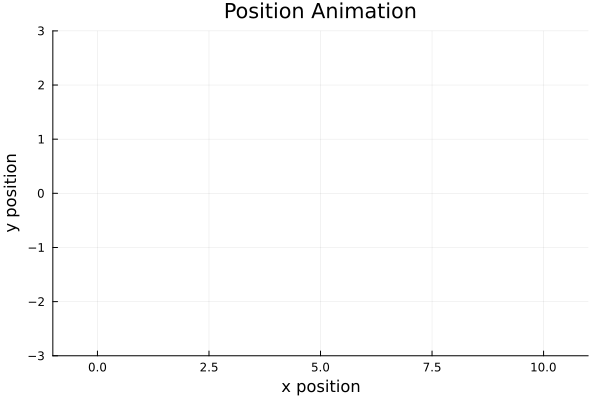

In [18]:
animation(robot_path, human_path, pos_xlims=[-1, 11])

In [45]:
function simulation_sweep(ego_ip::InteractionPlanner, other_ip::InteractionPlanner, sim_horizon, ego_boundary_conditions::Vector{Tuple{Vector{Float64}, Vector{Float64}}}, other_boundary_conditions::Vector{Tuple{Vector{Float64}, Vector{Float64}}}; ego_ibr_iterations=3::Int64, other_ibr_iterations=3::Int64)
    runs = maximum([length(ego_boundary_conditions), length(other_boundary_conditions)])

    ego_ego_hps = ego_ip.ego_planner.incon.hps
    ego_other_hps = ego_ip.other_planner.incon.hps
    other_ego_hps = other_ip.ego_planner.incon.hps
    other_other_hps = other_ip.other_planner.incon.hps

    if length(ego_boundary_conditions) == 1 
        for i in 1:(runs - 1)
            push!(ego_boundary_conditions, ego_boundary_conditions[1])
        end
    elseif length(other_boundary_conditions) == 1
        for i in 1:(runs - 1)
            push!(other_boundary_conditions, other_boundary_conditions[1])
        end
    end

    if length(ego_boundary_conditions) != length(other_boundary_conditions)
        throw(ArgumentError("length of 'ego_boundary_conditions' and 'other_boundary_conditions' must match"))
    end

    runs_dict = Dict{String, SimData}()

    for j in ProgressBar(1:runs)
        sim_ego_ip = InteractionPlanner(ego_ego_hps, ego_other_hps, ego_boundary_conditions[j][1], other_boundary_conditions[j][1], ego_boundary_conditions[j][2], other_boundary_conditions[j][2], "ECOS")
        sim_other_ip = InteractionPlanner(other_ego_hps, other_other_hps, other_boundary_conditions[j][1], ego_boundary_conditions[j][1], other_boundary_conditions[j][2], ego_boundary_conditions[j][2], "ECOS")

        ego_params = PlannerParams(sim_ego_ip.ego_planner.incon.hps, sim_ego_ip.ego_planner.incon.opt_params, sim_ego_ip.other_planner.incon.hps, sim_ego_ip.other_planner.incon.opt_params)
        other_params = PlannerParams(sim_other_ip.ego_planner.incon.hps, sim_other_ip.ego_planner.incon.opt_params, sim_other_ip.other_planner.incon.hps, sim_other_ip.other_planner.incon.opt_params)

        sim_params = IPSimParams(ego_params, other_params)

        ego_states, ego_controls, other_states, other_controls, solve_time = simulate_oc(sim_ego_ip, sim_other_ip, sim_horizon, ego_ibr_iterations=ego_ibr_iterations, other_ibr_iterations=other_ibr_iterations)

        sim_data = SimData(sim_params, solve_time, ego_states, ego_controls, other_states, other_controls)

        runs_dict["Run $(j)"] = sim_data

        # deleting variables
        sim_ego_ip = nothing
        sim_other_ip = nothing
        ego_params = nothing
        other_params = nothing
        sim_params = nothing
        ego_states = nothing
        ego_controls = nothing
        other_states = nothing
        other_controls = nothing
        sim_data = nothing
    end

    runs_dict
end

simulation_sweep (generic function with 3 methods)

In [46]:
robot_states = mohrs_circle_states(robot, [0., 0., 0., 0.], [10., 0., 0., 0.], pi / 6);

In [57]:
function run_experiment(ego_ip::InteractionPlanner, other_ip::InteractionPlanner, sim_horizon, ego_boundary_conditions::Vector{Tuple{Vector{Float64}, Vector{Float64}}}, other_boundary_conditions::Vector{Tuple{Vector{Float64}, Vector{Float64}}}; ego_ibr_iterations=3::Int64, other_ibr_iterations=3::Int64, save_path=""::String)
    start_time = time()
    println("-" ^ 80)
    println("Running Simulations")
    println("-" ^ 80)
    sweep_data = simulation_sweep(ego_ip, other_ip, sim_horizon, ego_boundary_conditions, other_boundary_conditions, ego_ibr_iterations=ego_ibr_iterations, other_ibr_iterations=other_ibr_iterations)
    println("-" ^ 80)
    println("Evaluating Simulations")
    println("-" ^ 80)
    metrics = evaluate_sim(sweep_data)
    end_time = time()
    if save_path != ""
        serialize(save_path, metrics)
    end

    print("Experiment finished in $(end_time - start_time)")

    metrics
end

run_experiment (generic function with 6 methods)

In [58]:
metrics_test = run_experiment(robot_ip, human_ip, 50, robot_states, [([10.; 0.; pi; 0.], [0.; 0.; pi; 0.])], other_ibr_iterations=1)

--------------------------------------------------------------------------------
Running Simulations
--------------------------------------------------------------------------------


0.0%┣                                               ┫ 0/12 [00:00<00:00, -0s/it]


8.3%┣███▋                                       ┫ 1/12 [00:11<Inf:Inf, InfGs/it]


16.7%┣███████▊                                      ┫ 2/12 [00:22<03:37, 22s/it]


25.0%┣███████████▌                                  ┫ 3/12 [00:33<02:27, 16s/it]


33.3%┣███████████████▍                              ┫ 4/12 [00:44<01:57, 15s/it]


41.7%┣███████████████████▏                          ┫ 5/12 [00:55<01:36, 14s/it]


50.0%┣███████████████████████                       ┫ 6/12 [01:06<01:19, 13s/it]


58.3%┣██████████████████████████▉                   ┫ 7/12 [01:17<01:04, 13s/it]


66.7%┣██████████████████████████████▊               ┫ 8/12 [01:28<00:50, 13s/it]


75.0%┣██████████████████████████████████▌           ┫ 9/12 [01:39<00:37, 12s/it]


83.3%┣█████████████████████████████████████▌       ┫ 10/12 [01:51<00:25, 12s/it]


91.7%┣█████████████████████████████████████████▎   ┫ 11/12 [02:02<00:12, 12s/it]


--------------------------------------------------------------------------------
Evaluating Simulations
--------------------------------------------------------------------------------


100.0%┣████████████████████████████████████████████┫ 12/12 [02:14<00:00, 12s/it]
100.0%┣████████████████████████████████████████████┫ 12/12 [02:14<00:00, 12s/it]
0.0%┣                                               ┫ 0/12 [00:00<00:00, -0s/it]


5151

8.3%┣███▋                                       ┫ 1/12 [00:00<Inf:Inf, InfGs/it]


5151

16.7%┣███████▉                                       ┫ 2/12 [00:00<00:02, 4it/s]


5151

25.0%┣███████████▊                                   ┫ 3/12 [00:00<00:02, 6it/s]


5151

33.3%┣███████████████▊                               ┫ 4/12 [00:00<00:01, 6it/s]


5151

41.7%┣███████████████████▋                           ┫ 5/12 [00:01<00:01, 7it/s]


5151

50.0%┣███████████████████████▌                       ┫ 6/12 [00:01<00:01, 7it/s]


5151

58.3%┣███████████████████████████▍                   ┫ 7/12 [00:01<00:01, 7it/s]


5151

66.7%┣███████████████████████████████▍               ┫ 8/12 [00:01<00:01, 7it/s]


5151

75.0%┣███████████████████████████████████▎           ┫ 9/12 [00:01<00:00, 7it/s]


5151

83.3%┣██████████████████████████████████████▍       ┫ 10/12 [00:01<00:00, 8it/s]


5151

91.7%┣██████████████████████████████████████████▏   ┫ 11/12 [00:01<00:00, 8it/s]


5151Experiment finished in 135.0133068561554

100.0%┣█████████████████████████████████████████████┫ 12/12 [00:01<00:00, 8it/s]
100.0%┣█████████████████████████████████████████████┫ 12/12 [00:01<00:00, 8it/s]


Dict{String, SimMetrics} with 12 entries:
  "Run 4"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamete…
  "Run 10" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamete…
  "Run 1"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamete…
  "Run 11" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamete…
  "Run 6"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamete…
  "Run 12" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamete…
  "Run 2"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamete…
  "Run 9"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamete…
  "Run 5"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamete…
  "Run 8"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamete…
  "Run 7"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamete…
  "Run 3"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerH

In [60]:
display_data(test_metrics)

GtkLabelLeaf(name="", parent, width-request=-1, height-request=-1, visible=TRUE, sensitive=TRUE, app-paintable=FALSE, can-focus=FALSE, has-focus=FALSE, is-focus=FALSE, focus-on-click=TRUE, can-default=FALSE, has-default=FALSE, receives-default=FALSE, composite-child=FALSE, style, events=0, no-show-all=FALSE, has-tooltip=FALSE, tooltip-markup=NULL, tooltip-text=NULL, window, opacity=1.000000, double-buffered, halign=GTK_ALIGN_FILL, valign=GTK_ALIGN_FILL, margin-left, margin-right, margin-start=0, margin-end=0, margin-top=0, margin-bottom=100, margin=100, hexpand=FALSE, vexpand=FALSE, hexpand-set=FALSE, vexpand-set=TRUE, expand=FALSE, scale-factor=1, xpad, ypad, label="<b><u>Sim 12 Metrics</u></b>
<b> </b> 
<b>Ego Average Acceleration = </b>0.2996
<b>Other Average Acceleration = </b>0.2984
<b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><